# FIM590: Machine Learning Project 1
## Iowa Housing Prices Modeling
George Armentrout

Group Members: Divija Balasankala, Sophia Feng, Isaac Gohn

In this project, information regarding approximately 2000 real estate listings in Iowa will be utilized in modeling the sale price of houses in the region.

Several different models will be employed. Although they are all linear regressions, each approach will have slight variation in their regularization method. Specifically, all regressions will utilize the mean square error cost function, however one model will have no regularization, one model wil use Ridge Regression with $\lambda = 0.10,0.30,0.60,$ and one model will use Lasso Regression with $\lambda = 0.02,0.06,0.10$.

This process is comprised of several components, listed as followed:
1. Investigate the provided data and features and decide which features to use in the regression.
2. Clean the data to contain only the features to be utilized and the associated sale price.
3. Divide the given dataset into the necessary subsets (training, validation, and test sets).
4. Utilizing the package Scikit-Learn, implement the specified models.
5. Train the models using the training set.
6. Utilize the validation set to select the best model.
7. Evaluate the best model's performance with the test data set.

### 1. Determining Features for Regression

In the dataset provided, there are 79 features listed with each real estate listing in addition to the sale price of the listing itself. Generally, including more features can allow for a more precise and accurate model. However, allowing for too may features may not be in the best interest of the model. This can be due to overfitting, where a model follows a dataset too closely and only accurately models the training dataset rather than the phenomena itself. Additionally, increasing the number of features demands more computational power, lowering the efficiency of the regression and worsening the performance of the model itself. For this project, 47 features are being considered as followed:

- Lot area (square feet)
- Overall quality (scale: 1 to 10)
- Overall condition (scale: 1 to 10)
- Year built
- Year remodeled (= year built if no remodeling or additions)
- Finished basement (square feet)
- Unfinished basement (square feet)
- Total basement (square feet)
- First floor (square feet)
- Second floor (square feet)
- Living area (square feet)
- Number of full bathrooms
- Number of half bathrooms
- Number of bedrooms
- Total rooms above grade
- Number of fireplaces
- Parking spaces in garage
- Garage area (square feet)
- Wood deck (square feet)
- Open porch (square feet)
- Enclosed porch (square feet)
- Neighborhood (25 features)*
- Basement quality**

\* There are 25 unique neighborhoods in the dataset. Each neighborhood is implemented as a binary feature (1 if the listing is in the specified neighborhood, 0 if not).

\*\* Basement quality is a qualitative metric that is categorized as either 'Excellent,' 'Good,' 'Typical,' 'Fair,' 'Poor,' or 'No basement.' For this regression, this metric is assigned a value of 5, 4, 3, 2, 1, or 0, respectively.

### 2. Cleaning the Data

With the above determination of features to be utilized in the regression, there is a large amount of superfluous data present in the dataset. Additionally, several of these datapoints need to be derived from information provided in the dataset. In cleaning this dataset, first ensure that all features needed for the regression are calculated and present. These can be in either pre-existing columns or new columns of the dataframe.

- Lot area (square feet): "LotArea"
- Overall quality (scale: 1 to 10): "OverallQual"
- Overall condition (scale: 1 to 10): "OverallCond"
- Year built: "YearBuilt"
- Year remodeled (= year built if no remodeling or additions): "YearRemodAdd"
- Finished basement (square feet): **Added "BsmtFinSF"**
- Unfinished basement (square feet): "BsmtUnfSF"
- Total basement (square feet): "TotalBsmtSF"
- First floor (square feet): "1stFlrSF"
- Second floor (square feet): "2ndFlrSF"
- Living area (square feet): "GrLivArea"
- Number of full bathrooms: "FullBath"
- Number of half bathrooms: "HalfBath"
- Number of bedrooms: "BedroomAbvGr"
- Total rooms above grade: "TotRmsAbvGrd"
- Number of fireplaces: "Fireplaces"
- Parking spaces in garage: "GarageCars"
- Garage area (square feet): "GarageArea"
- Wood deck (square feet): "WoodDeckSF"
- Open porch (square feet): "OpenPorchSF"
- Enclosed porch (square feet): "EnclosedPorch"
- Neighborhood (25 features): **Added "neighborhoodName"**
- Basement quality: **Added "BsmtQualNum"**

Please note, typically any bedrooms or bathrooms built below grade (in the basement) are not included in the count of bedrooms and bathrooms in appraisal, and therefore are not included in the number of full/half bathrooms or bedrooms. Similarly, no finished basement square footage is included in the living area feature.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split

housing_data = pd.read_excel("IA_House_Price_Original_Data.xlsx",header=3,index_col=0)
housing_data.head()

# Add Feature "BsmtFinSF" to count the square footage of the Finished Basement
housing_data["BsmtFinSF"] = housing_data["BsmtFinSF1"] + housing_data["BsmtFinSF2"]

# Add Feature "BsmtQualNum" to quantify the basement quality
basement_conditions = [
    (housing_data["BsmtQual"] == "Ex"),
    (housing_data["BsmtQual"] == "Gd"),
    (housing_data["BsmtQual"] == "Ta"),
    (housing_data["BsmtQual"] == "Fa"),
    (housing_data["BsmtQual"] == "Po"),
    (housing_data["BsmtQual"] == "NA"),
]

basement_quality_numbers = [5,4,3,2,1,0]

housing_data["BsmtQualNum"] = np.select(basement_conditions,basement_quality_numbers)

# Add the 25 features denoting which neighborhood the listing is in.
housing_data["Blmngtn"] = np.where(housing_data["Neighborhood"]=="Blmngtn", 1,0)
housing_data["Blueste"] = np.where(housing_data["Neighborhood"]=="Blueste", 1,0)
housing_data["BrDale"] = np.where(housing_data["Neighborhood"]=="BrDale", 1,0)
housing_data["BrkSide"] = np.where(housing_data["Neighborhood"]=="BrkSide", 1,0)
housing_data["ClearCr"] = np.where(housing_data["Neighborhood"]=="ClearCr", 1,0)
housing_data["CollgCr"] = np.where(housing_data["Neighborhood"]=="CollegeCr", 1,0)
housing_data["Crawfor"] = np.where(housing_data["Neighborhood"]=="Crawfor", 1,0)
housing_data["Edwards"] = np.where(housing_data["Neighborhood"]=="Edwards", 1,0)
housing_data["Gilbert"] = np.where(housing_data["Neighborhood"]=="Gilbert", 1,0)
housing_data["IDOTRR"] = np.where(housing_data["Neighborhood"]=="IDOTRR", 1,0)
housing_data["MeadowV"] = np.where(housing_data["Neighborhood"]=="MeadowV", 1,0)
housing_data["Mitchel"] = np.where(housing_data["Neighborhood"]=="Mitchel", 1,0)
housing_data["Names"] = np.where(housing_data["Neighborhood"]=="Names", 1,0)
housing_data["NoRidge"] = np.where(housing_data["Neighborhood"]=="NoRidge", 1,0)
housing_data["NPkVill"] = np.where(housing_data["Neighborhood"]=="NPkVill", 1,0)
housing_data["NridgHt"] = np.where(housing_data["Neighborhood"]=="NridgHt", 1,0)
housing_data["NWAmes"] = np.where(housing_data["Neighborhood"]=="NWAmes", 1,0)
housing_data["OldTown"] = np.where(housing_data["Neighborhood"]=="OldTown", 1,0)
housing_data["SWISU"] = np.where(housing_data["Neighborhood"]=="SWISU", 1,0)
housing_data["Sawyer"] = np.where(housing_data["Neighborhood"]=="Sawyer", 1,0)
housing_data["SawyerW"] = np.where(housing_data["Neighborhood"]=="SawyerW", 1,0)
housing_data["Somerst"] = np.where(housing_data["Neighborhood"]=="Somerst", 1,0)
housing_data["StoneBr"] = np.where(housing_data["Neighborhood"]=="StoneBr", 1,0)
housing_data["Timber"] = np.where(housing_data["Neighborhood"]=="Timber", 1,0)
housing_data["Veenker"] = np.where(housing_data["Neighborhood"]=="Veenker", 1,0)

Next, remove the unneeded data from the dataset. This helps promote organized and intentional data and can make analyzing the features in the regression easier. Additionally, separate the data frame into a collection of features and collectino of sale price values.

In [2]:
clean_housing_data = housing_data[["LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "BsmtFinSF", 
                                   "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "GrLivArea", "FullBath", "HalfBath",
                                   "BedroomAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageCars", "GarageArea", "WoodDeckSF",
                                   "OpenPorchSF", "EnclosedPorch", "BsmtQualNum", "Blmngtn", "Blueste", "BrDale", "BrkSide",
                                   "ClearCr","CollgCr","Crawfor","Edwards","Gilbert","IDOTRR","MeadowV","Mitchel","Names","NoRidge",
                                   "NPkVill","NridgHt","NWAmes","OldTown","SWISU","Sawyer","SawyerW","Somerst","StoneBr","Timber",
                                   "Veenker","SalePrice"]]
housing_prices= clean_housing_data["SalePrice"]
housing_features = clean_housing_data
housing_features.drop(columns='SalePrice')


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,NridgHt,NWAmes,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker
Id,,,,,,,,,,,,,,,,,,,,,
1,8450,7,5,2003,2003,706,150,856,856,854,...,0,0,0,0,0,0,0,0,0,0
2,9600,6,8,1976,1976,978,284,1262,1262,0,...,0,0,0,0,0,0,0,0,0,1
3,11250,7,5,2001,2002,486,434,920,920,866,...,0,0,0,0,0,0,0,0,0,0
4,9550,7,5,1915,1970,216,540,756,961,756,...,0,0,0,0,0,0,0,0,0,0
5,14260,8,5,2000,2000,655,490,1145,1145,1053,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,1936,4,7,1970,1970,0,546,546,546,546,...,0,0,0,0,0,0,0,0,0,0
2916,1894,4,5,1970,1970,252,294,546,546,546,...,0,0,0,0,0,0,0,0,0,0
2917,20000,5,7,1960,1996,1224,0,1224,1224,0,...,0,0,0,0,0,0,0,0,0,0


Now, in an effort to help with computation and model training, all of the features will be normalized using scikit-learn's StandardScaler to make the magnitude of the features comparable. Having features of similar magnitude allows the model to train more effectively, and will allow computation to be more efficient. Note that the actual sales price is not being regularized, and this will help in analysis of the models.

In [3]:
from sklearn.preprocessing import StandardScaler
columns_to_normalize = housing_features.columns

scaler = StandardScaler()
housing_features[columns_to_normalize] = scaler.fit_transform(housing_features[columns_to_normalize])
housing_features.head()


C:\Users\geotn\AppData\Local\Temp\ipykernel_16920\2232736722.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_features[columns_to_normalize] = scaler.fit_transform(housing_features[columns_to_normalize])


,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,NWAmes,OldTown,SWISU,Sawyer,SawyerW,Somerst,StoneBr,Timber,Veenker,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,-0.214321,0.656090,-0.510046,1.047463,0.897719,0.477576,-0.934304,-0.455573,-0.796475,1.217589,...,-0.217194,-0.299243,-0.12955,-0.234029,-0.211933,-0.258388,-0.133607,-0.159336,-0.091224,0.361313
2,-0.066755,-0.060092,2.189979,0.155412,-0.395305,1.069139,-0.629584,0.511453,0.285442,-0.786186,...,-0.217194,-0.299243,-0.12955,-0.234029,-0.211933,-0.258388,-0.133607,-0.159336,10.962056,0.015716
3,0.144970,0.656090,-0.510046,0.981385,0.849829,-0.000894,-0.288480,-0.303135,-0.625926,1.245745,...,-0.217194,-0.299243,-0.12955,-0.234029,-0.211933,-0.258388,-0.133607,-0.159336,-0.091224,0.553311
4,-0.073171,0.656090,-0.510046,-1.859960,-0.682643,-0.588108,-0.047432,-0.693756,-0.516669,0.987647,...,-0.217194,-0.299243,-0.12955,-0.234029,-0.211933,-0.258388,-0.133607,-0.159336,-0.091224,-0.515480
5,0.531208,1.372273,-0.510046,0.948346,0.754050,0.366658,-0.161134,0.232778,-0.026342,1.684510,...,-0.217194,-0.299243,-0.12955,-0.234029,-0.211933,-0.258388,-0.133607,-0.159336,-0.091224,0.892508


### 3. Partition the Training, Validation, and Test Sets

First, divide the cleaned data set into the features and the sale price. Then, utilizing Scikit Learn's train_test_split() function to randomly generate the appropriate training, validation, and test sets. Note that this function only splits the dataset into two groups, so the function is used twice (split into two groups, then split the second group into the second and third group).

In [4]:
x_train, x_rest, y_train, y_rest = train_test_split(housing_features,housing_prices, train_size = 1800.0/2919, random_state=22)
x_validate, x_test, y_validate, y_test = train_test_split(x_rest,y_rest,train_size = 600.0/(2919-1800), random_state=22)

# Now, (x_train, y_train), (x_valildate, y_validate), (x_test, y_test) represent the three datasets.

### 4. Implement the Specified Models

#### Linear Regression
First, consider a traditional linear regression model with no form of regularization. In this model, the cost function is just a standard mean square error function. Specifically, given $n$ features and $m$ points in a dataset, the cost function is:

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(y^{(i)}-h_\theta(x^{(i)}))^2
$$

This model can be implemented utilizing scikit-learn's LinearRegression class.


#### Ridge Regression
The ridge regression model is similar to linear regression, however there is an additional term in the cost function that is based upon the squared magnitude of $\theta$ values. The cost function is specifically:

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(y^{(i)}-h_\theta(x^{(i)}))^2 + \frac{\lambda}{m}\sum_{j=1}^n(\theta_j)^2
$$

Here, there is a parameter $\lambda$ that can be adjusted to establish sensitivity to the additional term. For this project, three different lambda values will be tested ($\lambda = 0.10,0.30,0.60$). This model will also be implemented utilizing scikit-learn's Ridge class.

#### Lasso Regression
The lasso regression model is very similar to ridge regression, except the additional term utilizes absolute value rather than squaring the coefficients.

$$
J(\theta) = \frac{1}{2m}\sum_{i=1}^m(y^{(i)}-h_\theta(x^{(i)}))^2 + \frac{\lambda}{m}\sum_{j=1}^n(\theta_j)^2
$$

Similar to the ridge regression, the parameter $\lambda$ establishes sensitivity to the additional term. For this regression, three different $\lambda$ values will be utilized ($\lambda = 0.02,0.06,0.10$). This model will be implemented utilizing scikit-learn's Lasso class.

### 5. Training the Models
Here, utilizing the specified scikit-learn classes, the models are implemented and trained utilizing the training set. Additionally, the predicted values for the validation set are computed for each regression, as well as the overall mean square error for the validation sets.

In [5]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error


### Linear Regression
linear = LinearRegression()
linear.fit(x_train,y_train)
linear_pred = linear.predict(x_validate)
linear_error = mean_squared_error(y_validate, linear_pred)
print("Linear Mean Squared Error: ", linear_error)



### Ridge Regression
ridge1 = Ridge(alpha = 0.10,max_iter=500000, tol=0.000001)
ridge1.fit(x_train,y_train)
ridge1_pred = ridge1.predict(x_validate)
ridge1_error = mean_squared_error(y_validate, ridge1_pred)
print("Ridge 0.10 Mean Squared Error: ", ridge1_error)

ridge3 = Ridge(alpha = 0.30,max_iter=500000, tol=0.000001)
ridge3.fit(x_train,y_train)
ridge3_pred = ridge3.predict(x_validate)
ridge3_error = mean_squared_error(y_validate, ridge3_pred)
print("Ridge 0.30 Mean Squared Error: ", ridge3_error)

ridge6 = Ridge(alpha = 0.60,max_iter=500000, tol=0.000001)
ridge6.fit(x_train,y_train)
ridge6_pred = ridge6.predict(x_validate)
ridge6_error = mean_squared_error(y_validate, ridge6_pred)
print("Ridge 0.60 Mean Squared Error: ", ridge6_error)



### Lasso Regression
lasso02 = Lasso(alpha = 0.02,max_iter=500000, tol=0.000001)
lasso02.fit(x_train,y_train)
lasso02_pred = lasso02.predict(x_validate)
lasso02_error = mean_squared_error(y_validate, lasso02_pred)
print("Lasso 0.02 Mean Squared Error: ", lasso02_error)

lasso06 = Lasso(alpha = 0.06,max_iter=500000, tol=0.000001)
lasso06.fit(x_train,y_train)
lasso06_pred = lasso06.predict(x_validate)
lasso06_error = mean_squared_error(y_validate, lasso06_pred)
print("Lasso 0.06 Mean Squared Error: ", lasso06_error)

lasso10 = Lasso(alpha = 0.10,max_iter=500000, tol=0.000001)
lasso10.fit(x_train,y_train)
lasso10_pred = lasso10.predict(x_validate)
lasso10_error = mean_squared_error(y_validate, lasso10_pred)
print("Lasso 0.10 Mean Squared Error: ", lasso10_error)

Linear Mean Squared Error:  2.484452626655484e-20
Ridge 0.10 Mean Squared Error:  118.47284239724131
Ridge 0.30 Mean Squared Error:  1063.6532317601025
Ridge 0.60 Mean Squared Error:  4239.116151055602
Lasso 0.02 Mean Squared Error:  0.11936325214648684
Lasso 0.06 Mean Squared Error:  0.0027431282061775135
Lasso 0.10 Mean Squared Error:  0.007619800569002204


### 6. Utilize the Validation Set to Select the Best Model

Now, select the model with the smallest mean squared error of the validation set. Given the large size of the dataset as well as the magnitude of the predicted valeus (100,000's), mean squared errors of such small magnitude indicate that all of these models are very accurate. With this in mind, overall, the ridge models performed the worst, the lasso models perform better, and the traditional linear regression performs the best. 

To get an indication for the accuracy visually, a plot can show the predicted price of the validation set versus the actual sale price. Additionally, the line $y=x$ is graphed as an ideal line this plot should reflect (as the predicted price would ideally be the actual sales price).

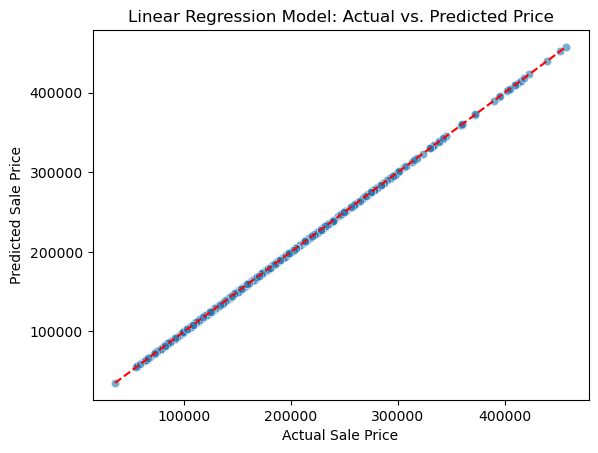

In [11]:
### Plot the predicted sales price of ridge6 vs. actual sales price (ridge6_pred vs. y_validate)
sns.scatterplot(x=y_validate,y=linear_pred,alpha=0.6)

### Add the ideal prediction line
min_val = min(y_validate)
max_val = max(y_validate)
plt.plot([min_val,max_val],[min_val,max_val], 'r--')

### Label the figure
plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Linear Regression Model: Actual vs. Predicted Price')

plt.show()

### 7. Evaluating Linear Regression Model with the Test Set

With the best model determined, the accuracy of this model can be evaluated with the remaining test set. This is done by utilizing the mean squared error method as well.

The mean squared error of the Linear Regression model is  2.3931133558043795e-20


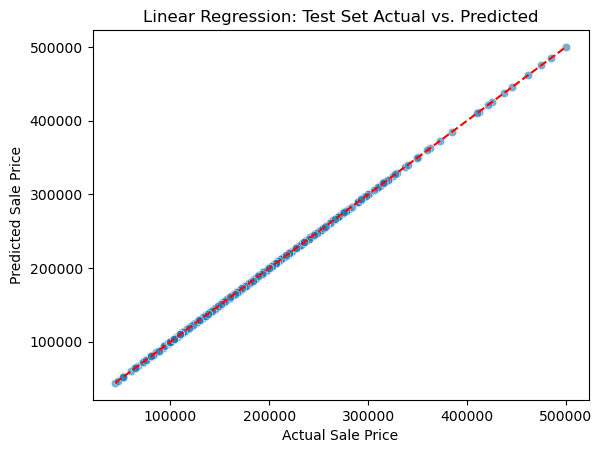

In [13]:
test_predict = linear.predict(x_test)
test_mse = mean_squared_error(y_test, test_predict)
print("The mean squared error of the Linear Regression model is ", test_mse)

sns.scatterplot(x=y_test,y=test_predict,alpha=0.6)
min_val = min(y_test)
max_val = max(y_test)
plt.plot([min_val,max_val],[min_val,max_val], 'r--')

plt.xlabel('Actual Sale Price')
plt.ylabel('Predicted Sale Price')
plt.title('Linear Regression: Test Set Actual vs. Predicted Price')

plt.show()

From this, it is apparent that the model does generally predict the actual value to some extent. More can be done to investigate the accuracy of the model. First, consider computing the error for each individual real estate listing, and graph a histogram showing the distribution of error.

<function matplotlib.pyplot.show(close=None, block=None)>

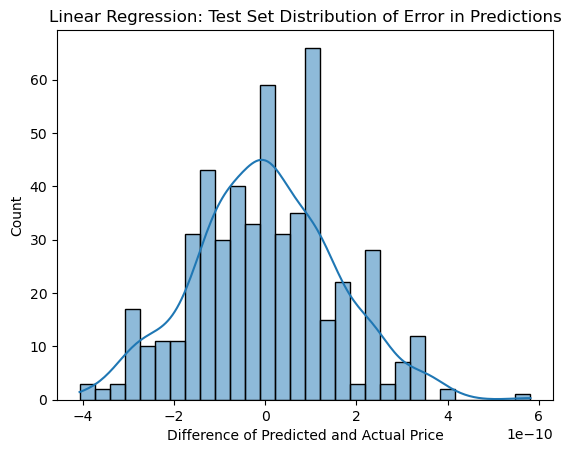

In [14]:
test_error = test_predict - y_test

sns.histplot(test_error, kde=True,bins=30)
plt.xlabel("Difference of Predicted and Actual Price")
plt.title("Linear Regression: Test Set Distribution of Error")
plt.show

This shows a roughly normal curve, but the magnitude makes this a bit hard to interpret (a difference of 10,000 is a 10% error for a $100,000 house, but 1% for 1,000,000). Therefore, considering the percent error for each listing would be beneficial as well. As such, the percent error for each listing is computed as follows:

$$\text{Percent Error} = \frac{(\text{Predicted Price})-(\text{Sale Price})}{(\text{Sale Price})}

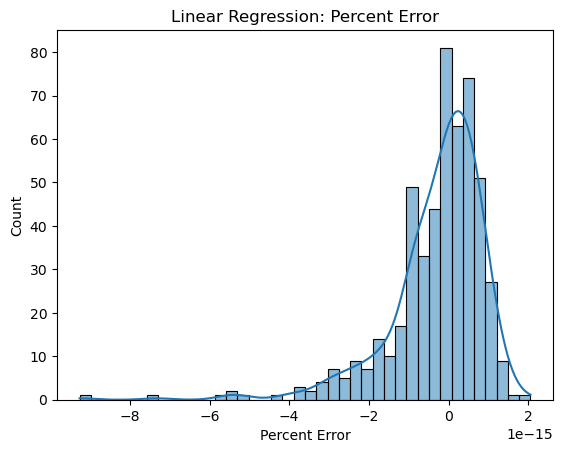

In [22]:
test_percent_error = test_error / y_test

sns.histplot(test_percent_error, kde=True,bins=40)
plt.title("Linear Regression: Percent Error")
plt.xlabel("Percent Error")
plt.show()

This provides more context to the magnitude of error with respect to the magnitude of sale price, demonstrating a much tighter distribution than that of just error. This indicates that magnitude of sale price and magnnitude of error are somewhat related - higher sale price can indicate a higher error. Additionally, this histogram indicates that the linear regression model generally under predicts the actual sale price of a listing.

Additionally, to provide further context to the performance of this model, similar histograms can be constructed using the less accurate models. In particular, consider the Ridge ($\lambda = 0.60$) model, with the worst mean square error.

The MSE of the ridge (0.60) model is:  4573.249224028694


<function matplotlib.pyplot.show(close=None, block=None)>

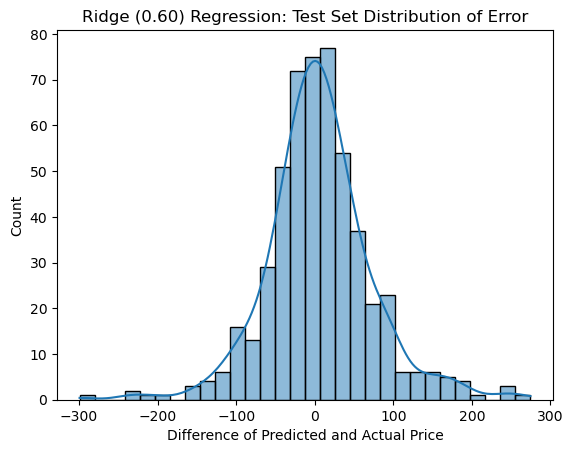

In [20]:
# Predict values of test set using ridge (0.60)
test_predict_bad = ridge6.predict(x_test)
test_mse_bad = mean_squared_error(y_test,test_predict_bad)
print("The MSE of the ridge (0.60) model is: ", test_mse_bad)

test_error_bad = test_predict_bad - y_test
sns.histplot(test_error_bad, kde=True,bins=30)
plt.xlabel("Difference of Predicted and Actual Price")
plt.title("Ridge (0.60) Regression: Test Set Distribution of Error")
plt.show


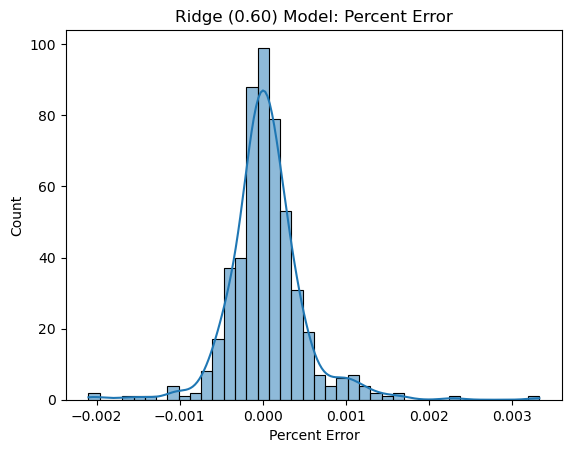

In [24]:
test_percent_error_bad = test_error_bad / y_test

sns.histplot(test_percent_error_bad, kde=True,bins=40)
plt.title("Ridge (0.60) Model: Percent Error")
plt.xlabel("Percent Error")
plt.show()

For the ridge (0.60) model, both error and percent error are orders of magnitude larger than the linear regression model, highlighting the accuracy of the linear regression model. However, this also highlights the accuracy of even the worse models. In the worst case, error does not exceed $\$300$, and percent error is still less than $1\%$ of the sale price for any predicted value.